# Experimentos de redes neuronales gráficas

Vamos a comenzar la parte de experimentación del TFG **REVISIÓN DE TÉCNICAS DE MACHINE LEARNING
EN REDES NEURONALES GRÁFICAS**, para ello comenzamos importando las librerias correspondientes, cargamos los datos y recuperamos información relevante de estos como el número de grafos, el número decaracterísticas de cada nodo, el conjunto de clases (este dataset buusca clasificar proteinas

Casilla para instalar los requerimientos y reinicia el kernel

In [ ]:
!pip install -r requirements.txt
import IPython

IPython.Application.instance().kernel.do_shutdown(True)

In [1]:
#Libreria base
import torch

#Modulos necesarias para la descarga y carga de los datasets
from torch_geometric.datasets import Planetoid,NELL
from torch_geometric.transforms import NormalizeFeatures

#Modulos para la creación de la estrutura de la red neuronal
from torch.nn import Linear,ModuleList
import torch.nn.functional as F
from torch_geometric.nn import ChebConv,summary

#Modulos para la visualización y para realizar el entrenamiento de los experimentos
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science','muted'])
from torch_geometric.loader import NeighborLoader

#Libreria para guardar y cargar los resultados de los experiemntos
import json

# Funcion de numpy

from numpy import arange

Casilla con la que guardamos los requirements del proyecto **(No ejecutar esta casilla salvo que este seguro de que realmente quiere modificar los requisitos del proyecto)**

In [ ]:
!jupyter nbconvert --to script ./"Proyecto mates.ipynb" & pipreqs --encoding utf-8 --force "./" & del "Proyecto mates.py"

Tras cargar las librerias necesarias para cargar los datos, generar la estructura de la red neuronal y cargar/mostrar los resultados de los experiemntos, nos disponemos a descargar los datasets que usaremos para los experiementos y ha mostrar algunas de las estadísticas de los mismos. No obstante antes de ver dichas estadísticas, intentaremos explicar el uso de los diferentes dataset y de NormalizeFeatures.

Con lo que respecta a los datos y tal como indicamos en la memroia del trabajo, el objetivo de nuestros experimentos es intentar comprobar de manera visual, el efecto que tienen los diferentes modulos dentro de la estructura de nuestra red. Es por esto, que para la elección de los dataset, se buscó que aunque los dataset tuviesen estadisticas muy diferentes para que los resultados fuesen más generales, tuviesen aun asi una temática común para intentar que los resultados obtenidos tengan algún parecido y se puedan extraer conclusiones con mayor facilidad. Dicho esto, nos fijamos en que Torch tiene dentro de su modulo de Dataset un módulo conocido como [Planetoid](https://pytorch-geometric.readthedocs.io/en/latest/generated/torch_geometric.datasets.Planetoid.html) el cual contiene tres datasets([citeseer](https://paperswithcode.com/dataset/citeseer), [Cora](https://paperswithcode.com/dataset/cora) y [PubMed](https://paperswithcode.com/dataset/pubmed)), los cuales tienen como objetivo el dado un dataset con una red de citaciones clasificar los papers contenidos en el grafo y descritos por su vector de palabras, según su temática.

En cuanto a el NormalizeFeatures(), fue seleccionado entre los diferentes módulos de preprocesamiento, simplemente para intentar reducir las posibilidades de que algun estado oculto de nuestra red diese algun problema de overflow debido a la suma/multiplicacion de numeros muy grades entre las características de cada nodo.

In [2]:
#Comenzamos cargando los datasets

dataset = Planetoid(root='data/Planetoid', name='Cora', transform=NormalizeFeatures())
dataset2 = Planetoid(root='data/Planetoid', name='Pubmed', transform=NormalizeFeatures())
dataset3 = Planetoid(root='data/Planetoid', name='CiteSeer', transform=NormalizeFeatures())
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")#Si el ordenador tiene GPU esta se usará por defecto

Ahora mostraremos algunas estadística de cada uno de los datasets en el mismo orden en que los hemos cargado

In [3]:
print("******************PubMed************************************")
print()
print(f'Dataset: {dataset2}:')
print('====================')
print(f'Number of graphs: {len(dataset2)}')
print(f'Number of features: {dataset2.num_features}')
print(f'Number of classes: {dataset2.num_classes}')

data2 = dataset2[0]  # Get the first graph object.
data2.to(device)
print(data2)

print('=============================================================')

# Gather some statistics about the first graph.
print(f'Number of nodes: {data2.num_nodes}')
print(f'Number of edges: {data2.num_edges}')
print(f'Average node degree: {data2.num_edges / data2.num_nodes:.2f}')
print(f'Has isolated nodes: {data2.has_isolated_nodes()}')
print(f'Has self-loops: {data2.has_self_loops()}')
print(f'Is undirected: {data2.is_undirected()}')

******************PubMed************************************

Dataset: Pubmed():
Number of graphs: 1
Number of features: 500
Number of classes: 3
Data(x=[19717, 500], edge_index=[2, 88648], y=[19717], train_mask=[19717], val_mask=[19717], test_mask=[19717])
Number of nodes: 19717
Number of edges: 88648
Average node degree: 4.50
Has isolated nodes: False
Has self-loops: False
Is undirected: True


In [4]:
print("******************CORA***************************************")
print()
print(f'Dataset: {dataset}:')
print('====================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

data = dataset[0]  # Get the first graph object.
data.to(device)
print(data)

print('=============================================================')

# Gather some statistics about the first graph.
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Has isolated nodes: {data.has_isolated_nodes()}')
print(f'Has self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')

******************CORA***************************************

Dataset: Cora():
Number of graphs: 1
Number of features: 1433
Number of classes: 7
Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])
Number of nodes: 2708
Number of edges: 10556
Average node degree: 3.90
Has isolated nodes: False
Has self-loops: False
Is undirected: True


In [5]:
print("****************Citeseer**********************************")
print()
print(f'Dataset: {dataset3}:')
print('====================')
print(f'Number of graphs: {len(dataset3)}')
print(f'Number of features: {dataset3.num_features}')
print(f'Number of classes: {dataset3.num_classes}')

data3 = dataset3[0]  # Get the first graph object.
data3.to(device)

print(data3)
print('=============================================================')

# Gather some statistics about the first graph.
print(f'Number of nodes: {data3.num_nodes}')
print(f'Number of edges: {data3.num_edges}')
print(f'Average node degree: {data3.num_edges / data3.num_nodes:.2f}')
print(f'Has isolated nodes: {data3.has_isolated_nodes()}')
print(f'Has self-loops: {data3.has_self_loops()}')
print(f'Is undirected: {data3.is_undirected()}')


****************Citeseer**********************************

Dataset: CiteSeer():
Number of graphs: 1
Number of features: 3703
Number of classes: 6
Data(x=[3327, 3703], edge_index=[2, 9104], y=[3327], train_mask=[3327], val_mask=[3327], test_mask=[3327])
Number of nodes: 3327
Number of edges: 9104
Average node degree: 2.74
Has isolated nodes: True
Has self-loops: False
Is undirected: True


## Creación del modelo

Tras la carga de los datos, procedemos a generar la estructura de nuestra red neuronal. Para ello, decidimos usar un diseño modular, en el que la red en su conjunto se conforma por dos clases diferenciadas, la primera la clase GCN la cual contiene toda la información que concierne a la red en su conjunto, como son el número de capas GNN y el uso de skip conection, asi como se ocupa de la generación de las capas GNN y de que la popagación se lleve a cabo correctamente por todas estas capas.

Por otro lado, la clase Layer, se ocupa de los aspectos específicos de cada una de las capas GNN, como son la inicalización del modulo ChebConv que forma su modulo de propagación asi como de llevar a cabo el pooling y la poxterior suma con la skip connection de la capa, si esta se ha decidido usar.

In [7]:

#Clase que representa a cada una de las capas GNN de nuestra red
class Layer(torch.nn.Module):
    #Función para inicializar los valores de la capa
    def __init__(self, hidden_channels,skip=True):
        super(Layer, self).__init__()
        
        self.out = hidden_channels
        
        self.skip = skip
        
        self.conv1 = ChebConv(hidden_channels, hidden_channels,normalize ="sym",K=3)
        
    #Función que devuelve los valores resultado de la aplicación de la capa de GNN
    def forward(self, x, edge_index):
        
        
        
        aux = x.clone() #clonamos los valores que se nos pasan para poder sumarlos con los valores procesados a modo de skip conection
        
        x = self.conv1( x,edge_index)
        if self.skip:
            x+=aux
        x = x.tanh()
        x = F.adaptive_avg_pool1d(x,self.out) #Usamos una función de pool que calcula la media de los valores según el grafo y el tamaño de los "filtros" que le pasemos
        
        
        return x

#Clase que representa a la red neuronal como conjunto de capas GNN y funciones de entrada y salida
class GCN(torch.nn.Module):
    
    #Función que incializa la red asi como las l layers que introduzcamos con o sin skip connection y las capas Densas que preprocesas y postprocesan la entrada y salida respectivamente
    def __init__(self, hidden_channels,dataset,layers=1,skip=True):
        super(GCN, self).__init__()
        
        self.out = hidden_channels
        self.Dense1 = Linear(dataset.num_node_features,hidden_channels)
        
        self.layers = layers if (layers >= 0 and isinstance(layers,int)) else  None
        if self.layers == None:
            Exception("el parametro layers tiene que ser un entero positivo mayor a 0")
        self.convolutions = ModuleList()
        for  _ in range(layers):
            self.convolutions.append(Layer(hidden_channels,skip))#Generamos las capas especificadas
        self.lin1 = Linear(hidden_channels,hidden_channels//2)
        self.lin2 = Linear(hidden_channels//2, dataset.num_classes)
    
    #Función que devuelve el resultado de aplicar la red a una entrada 
    def forward(self, x, edge_index):
         
        
        x = self.Dense1(x)
        for conv in self.convolutions:#Iteramos sobre cada una de nuestras capas GNN
            x= conv(x, edge_index)
            x = F.dropout(x, p=0.4, training=self.training)#Función que lidea con el overfitting mediante el cambio de algunos valores a 0
        
        
        x = self.lin1(x)
        x = self.lin2(x)
       
        
        return x



Dado que el codigo anterior es algo extenso veamos como se comporta con un ejemplo, en este caso vamos a aplicar nuestra red sobre el dataset de Cora y vamos a construirla con skip conection, 2 capas y 64 "filtros".

In [8]:
model = GCN(hidden_channels=64,dataset = dataset,layers =2)
print(model)
print([ aux.shape for aux in list(model.parameters())])

GCN(
  (Dense1): Linear(in_features=1433, out_features=64, bias=True)
  (convolutions): ModuleList(
    (0-1): 2 x Layer(
      (conv1): ChebConv(64, 64, K=3, normalization=sym)
    )
  )
  (lin1): Linear(in_features=64, out_features=32, bias=True)
  (lin2): Linear(in_features=32, out_features=7, bias=True)
)
[torch.Size([64, 1433]), torch.Size([64]), torch.Size([64]), torch.Size([64, 64]), torch.Size([64, 64]), torch.Size([64, 64]), torch.Size([64]), torch.Size([64, 64]), torch.Size([64, 64]), torch.Size([64, 64]), torch.Size([32, 64]), torch.Size([32]), torch.Size([7, 32]), torch.Size([7])]


Como se puede apreciar en el prompt de la celda anterior, el codigo que hemos introducido, nos ha generado una red conformada por 3 capas densas, 1 para procesar el input y las otras dos para procesar el output en forma de un vector de tamaño el numero de clases a clasificar el cual nos indica a que clase es más probable que pertenezca; y conformada tambien por 2 capas GNN las cuales aplican los filtros de 64 como tambien hacn las capas densas(notese que en el prompt solo aparecen los elementos que pueden ser entrenados).

Fijandonos más abajo, podemos el tamaño de los parametros entrenables de cada una de las capas, que como se puede ver, en la mayoría de casos coincide con el numero de "hidden_chanels" que se especifico en la creación de la red neuronal, esto se debe a que con la primera capa estamos de input( la llamada Dense1), para cada nodo estamos condensando la información de su vector de caracteríticas en una combinación lineal des estas de 64 formas diferentes tras lo cual pasamos a procesar el grafo con las diferentes capas GNN para finalmente transformar las caracteríticas resultantes de cada nodo en el vector que indica como de probable es que dicho nodo pertenezca a una clase.

## Preparacion para los experimentos

Tras crear las clases que nos permitirán generar las redes neuronales para nuestros experimentos, nos dispusimos a crear una función que realizase todas las acciones necesarias para llevar a cabo el entrenamiento, de forma que no nos haga falta volver a codificar por cada iteración de cada experimento .

In [9]:
#Función que realiza el entrnamiento y test del modelo que le pasamos como parametro, ademas permite mostrar la evolución del entrenamiento con prompt si printit está en True
# y hacer un entrenamiento en forma de batches si la opcion batch está en True y se le parasn un loader de train y test 
def model_train_eval(loader_train,loader_val,loader_test, model, printit=True,batch = True):
    
    #Función de entrenamiento
    def train(train_,batch = True):
        model.train()#Disponemos el modelo en su estado de entrenamiento
        loss_ = 0
        if batch:
            for data in loader_train:
                optimizer.zero_grad()  # Limpiamos los grandientes que se acumulan por defecto tras cada llamada a loss.backward()
                out = model(data.x, data.edge_index)  # Hacemos predicciones con los pesos actuales del modelo
                loss = criterion(out, data.y)  # Calculamos la perdida
                loss.backward()  # Derivamos los gradientes
                optimizer.step()  # Actualizamos los parametros basandonos en los gradientes.
                loss_ += loss 
            loss_ = loss_ / len(loader_train) #La perdida final es la perdida media de todos los batches
        else:
            optimizer.zero_grad()  
            out = model(loader_train.x, loader_train.edge_index)  
            loss_ = criterion(out[train_], loader_train.y[train_])  
            loss_.backward() 
            optimizer.step()
            #En este caso la peerdida será simplemente la perdida calculada por los nodos de Train
        return loss_
    
    #Función de test
    def test(loader, batch = True):
        model.eval()#Disponemos el modelo en su estado de test(nos saca del modo de entrenamiento)
        correct = 0 #Numero de predicciones correctas
        num = 0 #Numero total de predicciones
        if batch:
            for data in loader: #Por cada batch
                out = model(data.x, data.edge_index)#  Hacemos predicciones sobre los nodos de test
                pred = out.argmax(dim=1)  # Indicamos que la clase sleccionada para cada nodo es la que mayor probabilidad tenga
                correct = (pred == data.y).sum()  # Numero de correctamente clasificados
                num += len(pred)
            acc = int(correct) / num  # Derive ratio of correct predictions.
        else:
            out = model(loader_train.x, loader_train.edge_index)
            pred = out.argmax(dim=1) 
            correct = pred[loader] == loader_train.y[loader]  
            acc = int(correct.sum()) / int(loader.sum())  
        return acc
    
    #En este caso hemos decidido que para todos los esperimentos se usará el optimizador Adam para el entrenamiento(algoritmo que realiza el backpropagation)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.0005, weight_decay=5e-5)
    criterion = torch.nn.CrossEntropyLoss() #Inicializamos la funcion de perdida
    losses = []
    val_accuracies = []
    test_accuracies = []
    train_ =loader_train
    val_= loader_val
    test_ =loader_test
    if not batch:
         
        val_ = loader_train.val_mask
        train_ = val_
        test_ = loader_train.test_mask
    #Realizamos el entrenamiento y el test por 100 iteraciones para cada modelo
    for epoch in range(1, 101):
        loss = train(train_,batch)
        losses.append(loss)
        val_acc = test(val_,batch)
        val_accuracies.append(val_acc)
        test_acc = test(test_,batch)
        test_accuracies.append(test_acc)
        if printit:
            print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, Val: {val_acc:.4f}, Test: {test_acc:.4f}')

    return losses, val_accuracies, test_accuracies


Tras crear las funciones destinadas a realizar el entrenamiento y el test de nuestros modelos, simplemente nos queda preparar los datos para que puedan ser procesados tanto en formato batch como en formato estocastico.

In [6]:
datasets = [dataset,dataset2,dataset3]
datas = [data,data2,data3]
aux_ = []
for data_ in datas:
    a = torch.ones(len(data_.y), dtype=torch.bool,device = device)
    aux = torch.logical_and(a,torch.logical_not(data_.val_mask))
    train_mask = torch.logical_and(aux,torch.logical_not(data_.test_mask))

    #Loaders para poder entrenar en un formato batch
    loader_train = NeighborLoader(
        data_,
        #Recogemos 20 vecinos para 10 iteraciones
        num_neighbors=[20] * 10,
        #Numero de nodos sobre los que construir nuestros subgrafos
        batch_size=1024,
        input_nodes=train_mask,
    )
    loader_val = NeighborLoader(
        data_,
        num_neighbors=[20] * 10,
        batch_size=1024,
        input_nodes=data_.val_mask,
    )
    loader_test = NeighborLoader(
        data_,
        num_neighbors=[20] * 10,
        batch_size=1024,
        input_nodes=data_.test_mask,
    )
    aux_.append((loader_train,loader_val,loader_test))
datas2 = aux_
n_dataset ={0:"Cora",1:"PubMed",2:"CiteSeer"}
max_accurracy ={0:0.9016,1:0.9144,2:0.8207} #Maximas precisiones registradas en la pagina https://paperswithcode.com/. Lo usaremos como referencia para saber que los modelos estaán 
#fucnionando correctamente

Antes de ponernos con los experimentos, realizaremos una prueba para comprobar que el modelo diseñado y las funciones de entrenamiento y  test funcionan correctamente.

In [12]:



model = GCN(hidden_channels=32,dataset= datasets[1],layers =1,skip=True) #Modelo GCN formado por una capa GNN con skip connection y 32 "filtros"
model.to(device)
aux = model_train_eval(datas2[1][0],datas2[1][1],datas2[1][2],model)



Epoch: 001, Loss: 1.1139, Val: 0.3077, Test: 0.3066
Epoch: 002, Loss: 1.0838, Val: 0.5346, Test: 0.5362
Epoch: 003, Loss: 1.0501, Val: 0.6535, Test: 0.6525
Epoch: 004, Loss: 1.0180, Val: 0.6528, Test: 0.6528
Epoch: 005, Loss: 0.9705, Val: 0.6562, Test: 0.6559
Epoch: 006, Loss: 0.8878, Val: 0.7723, Test: 0.7690
Epoch: 007, Loss: 0.7692, Val: 0.8056, Test: 0.8065
Epoch: 008, Loss: 0.6468, Val: 0.8188, Test: 0.8182
Epoch: 009, Loss: 0.5523, Val: 0.8318, Test: 0.8319
Epoch: 010, Loss: 0.4899, Val: 0.8426, Test: 0.8418
Epoch: 011, Loss: 0.4482, Val: 0.8495, Test: 0.8511
Epoch: 012, Loss: 0.4195, Val: 0.8554, Test: 0.8575
Epoch: 013, Loss: 0.3979, Val: 0.8630, Test: 0.8622
Epoch: 014, Loss: 0.3815, Val: 0.8681, Test: 0.8683
Epoch: 015, Loss: 0.3675, Val: 0.8743, Test: 0.8729
Epoch: 016, Loss: 0.3553, Val: 0.8777, Test: 0.8770
Epoch: 017, Loss: 0.3444, Val: 0.8815, Test: 0.8809
Epoch: 018, Loss: 0.3354, Val: 0.8844, Test: 0.8837
Epoch: 019, Loss: 0.3270, Val: 0.8886, Test: 0.8882
Epoch: 020, 

## Experimentos

Tras tener todas las herramientas necesarias para el desarrollo de nuestros experimentos, procederemos a realizarlos.No obstante, antes de prodeder a su relización vamos a fijar cuales van a ser estos experimentos y como se van a llevar a cabo.

Para empezar, dada la naturaleza aleatoria en la incialización de los parametros del modelo y algún proceso relacionado con el entrenamiento, para favorecer que los modelos obtengan los mejores resultados posibles, se decidio que cada experiemento se realizaría 50 veces, de forma que de esas 50 iteraciones se extrairía el modelo con mayor pecisión y se utilizaría este para sacar las conclusiones correspondientes al experimento.

En cuento a los experimentos que vamos a realizar, simplemente añadir que los tres experimentos que se van a realizar para visualizar el efecto de los modulos que componen la capa GNN, se van a realizar sobre cada uno de los tres dataset, por lo que en total vamos a tener 3 experimentos para ver el efecto de la acumulación de capas GNN, 3 experiemtos con los que apreciar el efecto de no tener la skip conection y tres experimentos en los que veremos el efecto de no utilizar ningun modulo de pooling a modo de loader de los datos(notese que los 6 últimos experimentos dependen de los resultados de los tres primeros, ya que en estos tambien realizamos las 11 iteraciones para acumular capas GNN para poder comporbar los cambios que se producen al no tener el elemneto correspondiente).

### Acumulación de capas

#### Cora 

In [ ]:

r_dataset = dict()
aux2 =[]
    
for l in range(11): # Hacemos 11 experimentos con entre 0 y 10 capas GNN
    plt.figure(figsize=(10,7))
    plt.title("Mejor modelo de la capa {}".format(l))
    for it in range(50):
        
        model = GCN(hidden_channels=32,dataset= datasets[0],layers = l,skip=True)
        model.to(device)
        aux = model_train_eval(datas2[0][0],datas2[0][1],datas2[0][2],model,printit = False)
        if l in r_dataset.keys():
            if aux2[-1][0] < aux[2][-1]:
                    r_dataset[l]= (aux[1],aux[2])
                    aux2[-1] = (r_dataset[l][1][-1],max(r_dataset[l][1]))
                    
        else:
            r_dataset[l]= (aux[1],aux[2])
            aux2.append((r_dataset[l][1][-1],max(r_dataset[l][1])))
        print(it,end =",")
    print()
    plt.plot(list(range(100)),r_dataset[l][1])
    plt.show()
plt.figure(figsize=(10,7))
plt.title("Precisión segun el numero de capas del dataset {}".format(n_dataset[0]))
plt.plot(list(range(11)),[a[0] for a in aux2 ],c ="blue",marker ="x",linestyle="-",label="Precisión final")
plt.plot(list(range(11)),[a[1] for a in aux2 ],c ="purple",marker ="x",linestyle="-",label ="Maxima precisión conseguida")
plt.axhline(y = max_accurracy[0], color = 'r', linestyle = '--',label = "Maxima precisión en papers" ) 
for b1,b2 in zip([a[0] for a in aux2 ],[(a1+0.01,a2+0.01  )for a1,a2 in zip(list(range(11)),[a[0] for a in aux2])]):
    plt.annotate(b1, b2)
plt.legend()
plt.show()
    

In [ ]:

with open('data/resultados_{}.txt'.format(n_dataset[0]), 'w') as convert_file:
    convert_file.write(json.dumps(r_dataset))

#### Pubmed 

In [ ]:

r_dataset = dict()
aux2 =[]
    
for l in range(11):
    plt.figure(figsize=(10,7))
    plt.title("Mejor modelo de la capa {}".format(l))
    for it in range(50):
        
        model = GCN(hidden_channels=32,dataset= datasets[1],layers = l,skip=True)
        model.to(device)
        aux = model_train_eval(datas2[1][0],datas2[1][1],datas2[1][2],model,printit = False)
        if l in r_dataset.keys():
            if aux2[-1][0] < aux[2][-1]:
                    r_dataset[l]= (aux[1],aux[2])
                    aux2[-1] = (r_dataset[l][1][-1],max(r_dataset[l][1]))
                    
        else:
            r_dataset[l]= (aux[1],aux[2])
            aux2.append((r_dataset[l][1][-1],max(r_dataset[l][1])))
        print(it,end =",")
    print()
    plt.plot(list(range(100)),r_dataset[l][1])
    plt.show()
plt.figure(figsize=(10,7))
plt.title("Precisión segun el numero de capas del dataset {}".format(n_dataset[1]))
plt.plot(list(range(11)),[a[0] for a in aux2 ],c ="blue",marker ="x",linestyle="-",label="Precisión final")
plt.plot(list(range(11)),[a[1] for a in aux2 ],c ="purple",marker ="x",linestyle="-",label ="Maxima precisión conseguida")
plt.axhline(y = max_accurracy[1], color = 'r', linestyle = '--',label = "Maxima precisión en papers" ) 
for b1,b2 in zip([a[0] for a in aux2 ],[(a1+0.01,a2+0.01  )for a1,a2 in zip(list(range(11)),[a[0] for a in aux2])]):
    plt.annotate("%.4f" %b1, b2)
plt.legend()
plt.show()

In [82]:

with open('data/resultados_{}.txt'.format(n_dataset[1]), 'w') as convert_file:
    convert_file.write(json.dumps(r_dataset))


#### Citeseer

In [ ]:
r_dataset = dict()
aux2 =[]
    
for l in range(11):
    plt.figure(figsize=(10,7))
    plt.title("Mejor modelo de la capa {}".format(l))
    for it in range(50):
        
        model = GCN(hidden_channels=32,dataset= datasets[2],layers = l,skip=True)
        model.to(device)
        aux = model_train_eval(datas2[2][0],datas2[2][1],datas2[2][2],model,printit = False)
        if l in r_dataset.keys():
            if aux2[-1][0] < aux[2][-1]:
                    r_dataset[l]= (aux[1],aux[2])
                    aux2[-1] = (r_dataset[l][1][-1],max(r_dataset[l][1]))
                    
        else:
            r_dataset[l]= (aux[1],aux[2])
            aux2.append((r_dataset[l][1][-1],max(r_dataset[l][1])))
        print(it,end =",")
    print()
    plt.plot(list(range(100)),r_dataset[l][1])
    plt.show()
plt.figure(figsize=(10,7))
plt.title("Precisión segun el numero de capas del dataset {}".format(n_dataset[2]))
plt.plot(list(range(11)),[a[0] for a in aux2 ],c ="blue",marker ="x",linestyle="-",label="Precisión final")
plt.plot(list(range(11)),[a[1] for a in aux2 ],c ="purple",marker ="x",linestyle="-",label ="Maxima precisión conseguida")
plt.axhline(y = max_accurracy[2], color = 'r', linestyle = '--',label = "Maxima precisión en papers" ) 
for b1,b2 in zip([a[0] for a in aux2 ],[(a1+0.01,a2+0.01  )for a1,a2 in zip(list(range(11)),[a[0] for a in aux2])]):
    plt.annotate("%.4f" % b1, b2)
plt.legend()
plt.show()

In [24]:

with open('data/resultados_{}.txt'.format(n_dataset[2]), 'w') as convert_file:
    convert_file.write(json.dumps(r_dataset))

### Sin conexion skip 

#### Cora

In [ ]:
r_dataset = dict()
aux2 =[]
    
for l in range(11):
    plt.figure(figsize=(10,7))
    plt.title("Mejor modelo de la capa {}".format(l))
    for it in range(50):
        
        model = GCN(hidden_channels=32,dataset= datasets[0],layers = l,skip=False)
        model.to(device)
        aux = model_train_eval(datas2[0][0],datas2[0][1],datas2[0][2],model,printit = False)
        if l in r_dataset.keys():
            if aux2[-1][0] < aux[2][-1]:
                    r_dataset[l]= (aux[1],aux[2])
                    aux2[-1] = (r_dataset[l][1][-1],max(r_dataset[l][1]))
                    
        else:
            r_dataset[l]= (aux[1],aux[2])
            aux2.append((r_dataset[l][1][-1],max(r_dataset[l][1])))
        print(it, end =",")
    print()
    plt.plot(list(range(100)),r_dataset[l][1])
    plt.show()
plt.figure(figsize=(10,7))
plt.title("Precisión segun el numero de capas del dataset {}".format(n_dataset[1]))
plt.plot(list(range(11)),[a[0] for a in aux2 ],c ="blue",marker ="x",linestyle="-",label="Precisión final")
plt.plot(list(range(11)),[a[1] for a in aux2 ],c ="purple",marker ="x",linestyle="-",label ="Maxima precisión conseguida")
plt.axhline(y = max_accurracy[0], color = 'r', linestyle = '--',label = "Maxima precisión en papers" ) 
for b1,b2 in zip([a[0] for a in aux2 ],[(a1+0.01,a2+0.01  )for a1,a2 in zip(list(range(11)),[a[0] for a in aux2])]):
    plt.annotate("%.4f" %b1, b2)
plt.legend()
plt.show()

In [12]:

with open('data/resultados_{}_noskip.txt'.format(n_dataset[0]), 'w') as convert_file:
    convert_file.write(json.dumps(r_dataset))


#### Pubmed 

In [ ]:
r_dataset = dict()
aux2 =[]
    
for l in range(11):
    plt.figure(figsize=(10,7))
    plt.title("Mejor modelo de la capa {}".format(l))
    for it in range(50):
        
        model = GCN(hidden_channels=32,dataset= datasets[1],layers = l,skip=False)
        model.to(device)
        aux = model_train_eval(datas2[1][0],datas2[1][1],datas2[1][2],model,printit = False)
        if l in r_dataset.keys():
            if aux2[-1][0] < aux[2][-1]:
                    r_dataset[l]= (aux[1],aux[2])
                    aux2[-1] = (r_dataset[l][1][-1],max(r_dataset[l][1]))
                    
        else:
            r_dataset[l]= (aux[1],aux[2])
            aux2.append((r_dataset[l][1][-1],max(r_dataset[l][1])))
        print(it, end =",")
    print()
    plt.plot(list(range(100)),r_dataset[l][1])
    plt.show()
plt.figure(figsize=(10,7))
plt.title("Precisión segun el numero de capas del dataset {}".format(n_dataset[1]))
plt.plot(list(range(11)),[a[0] for a in aux2 ],c ="blue",marker ="x",linestyle="-",label="Precisión final")
plt.plot(list(range(11)),[a[1] for a in aux2 ],c ="purple",marker ="x",linestyle="-",label ="Maxima precisión conseguida")
plt.axhline(y = max_accurracy[1], color = 'r', linestyle = '--',label = "Maxima precisión en papers" ) 
for b1,b2 in zip([a[0] for a in aux2 ],[(a1+0.01,a2+0.01  )for a1,a2 in zip(list(range(11)),[a[0] for a in aux2])]):
    plt.annotate("%.4f" %b1, b2)
plt.legend()
plt.show()

In [ ]:
with open('data/resultados_{}_noskip.txt'.format(n_dataset[1]), 'w') as convert_file:
    convert_file.write(json.dumps(r_dataset))


#### Citeseer

In [ ]:
r_dataset = dict()
aux2 =[]
    
for l in range(11):
    plt.figure(figsize=(10,7))
    plt.title("Mejor modelo de la capa {}".format(l))
    for it in range(50):
        
        model = GCN(hidden_channels=32,dataset= datasets[2],layers = l,skip=False)
        model.to(device)
        aux = model_train_eval(datas2[2][0],datas2[2][1],datas2[2][2],model,printit = False)
        if l in r_dataset.keys():
            if aux2[-1][0] < aux[2][-1]:
                    r_dataset[l]= (aux[1],aux[2])
                    aux2[-1] = (r_dataset[l][1][-1],max(r_dataset[l][1]))
                    
        else:
            r_dataset[l]= (aux[1],aux[2])
            aux2.append((r_dataset[l][1][-1],max(r_dataset[l][1])))
        print(it, end =",")
    print()
    plt.plot(list(range(100)),r_dataset[l][1])
    plt.show()
plt.figure(figsize=(10,7))
plt.title("Precisión segun el numero de capas del dataset {}".format(n_dataset[2]))
plt.plot(list(range(11)),[a[0] for a in aux2 ],c ="blue",marker ="x",linestyle="-",label="Precisión final")
plt.plot(list(range(11)),[a[1] for a in aux2 ],c ="purple",marker ="x",linestyle="-",label ="Maxima precisión conseguida")
plt.axhline(y = max_accurracy[2], color = 'r', linestyle = '--',label = "Maxima precisión en papers" ) 
for b1,b2 in zip([a[0] for a in aux2 ],[(a1+0.01,a2+0.01  )for a1,a2 in zip(list(range(11)),[a[0] for a in aux2])]):
    plt.annotate("%.4f" %b1, b2)
plt.legend()
plt.show()

In [ ]:
with open('data/resultados_{}_noskip.txt'.format(n_dataset[2]), 'w') as convert_file:
    convert_file.write(json.dumps(r_dataset))


### Estocastico

#### Cora

In [ ]:
r_dataset = dict()
aux2 =[]
    
for l in range(11):
    plt.figure(figsize=(10,7))
    plt.title("Mejor modelo de la capa {}".format(l))
    for it in range(50):
        
        model = GCN(hidden_channels=32,dataset= datasets[0],layers = l,skip=True)
        model.to(device)
        aux = model_train_eval(datas[0],None,None,model,printit = False,batch = False)
        if l in r_dataset.keys():
            if aux2[-1][0] < aux[2][-1]:
                    r_dataset[l]= (aux[1],aux[2])
                    aux2[-1] = (r_dataset[l][1][-1],max(r_dataset[l][1]))
                    
        else:
            r_dataset[l]= (aux[1],aux[2])
            aux2.append((r_dataset[l][1][-1],max(r_dataset[l][1])))
    plt.plot(list(range(100)),r_dataset[l][1])
    plt.show()
plt.figure(figsize=(10,7))
plt.title("Precisión segun el numero de capas del dataset {}".format(n_dataset[0]))
plt.plot(list(range(11)),[a[0] for a in aux2 ],c ="blue",marker ="x",linestyle="-",label="Precisión final")
plt.plot(list(range(11)),[a[1] for a in aux2 ],c ="purple",marker ="x",linestyle="-",label ="Maxima precisión conseguida")
plt.axhline(y = max_accurracy[0], color = 'r', linestyle = '--',label = "Maxima precisión en papers" ) 
for b1,b2 in zip([a[0] for a in aux2 ],[(a1+0.01,a2+0.001  )for a1,a2 in zip(list(range(11)),[a[0] for a in aux2])]):
    plt.annotate("%.4f" % b1, b2)
plt.legend()
plt.show()

In [ ]:

with open('data/resultados_{}_no_samp.txt'.format(n_dataset[0]), 'w') as convert_file:
    convert_file.write(json.dumps(r_dataset))

#### Pubmed

In [ ]:
r_dataset = dict()
aux2 =[]
    
for l in range(11):
    plt.figure(figsize=(10,7))
    plt.title("Mejor modelo de la capa {}".format(l))
    for it in range(50):
        
        model = GCN(hidden_channels=32,dataset= datasets[1],layers = l,skip=True)
        model.to(device)
        aux = model_train_eval(datas[1],None,None,model,printit = False,batch = False)
        if l in r_dataset.keys():
            if aux2[-1][0] < aux[2][-1]:
                    r_dataset[l]= (aux[1],aux[2])
                    aux2[-1] = (r_dataset[l][1][-1],max(r_dataset[l][1]))
                    
        else:
            r_dataset[l]= (aux[1],aux[2])
            aux2.append((r_dataset[l][1][-1],max(r_dataset[l][1])))
        print(it, end =",")
    print()
    plt.plot(list(range(100)),r_dataset[l][1])
    plt.show()
plt.figure(figsize=(10,7))
plt.title("Precisión segun el numero de capas del dataset {}".format(n_dataset[1]))
plt.plot(list(range(11)),[a[0] for a in aux2 ],c ="blue",marker ="x",linestyle="-",label="Precisión final")
plt.plot(list(range(11)),[a[1] for a in aux2 ],c ="purple",marker ="x",linestyle="-",label ="Maxima precisión conseguida")
plt.axhline(y = max_accurracy[1], color = 'r', linestyle = '--',label = "Maxima precisión en papers" ) 
for b1,b2 in zip([a[0] for a in aux2 ],[(a1+0.01,a2+0.001  )for a1,a2 in zip(list(range(11)),[a[0] for a in aux2])]):
    plt.annotate("%.4f" % b1, b2)
plt.legend()
plt.show()

In [ ]:

with open('data/resultados_{}_no_samp.txt'.format(n_dataset[1]), 'w') as convert_file:
    convert_file.write(json.dumps(r_dataset))

#### Citeseer

In [ ]:
r_dataset = dict()
aux2 =[]
    
for l in range(11):
    plt.figure(figsize=(10,7))
    plt.title("Mejor modelo de la capa {}".format(l))
    for it in range(50):
        
        model = GCN(hidden_channels=32,dataset= datasets[2],layers = l,skip=True)
        model.to(device)
        aux = model_train_eval(datas[2],None,None,model,printit = False,batch = False)
        if l in r_dataset.keys():
            if aux2[-1][0] < aux[2][-1]:
                    r_dataset[l]= (aux[1],aux[2])
                    aux2[-1] = (r_dataset[l][1][-1],max(r_dataset[l][1]))
                    
        else:
            r_dataset[l]= (aux[1],aux[2])
            aux2.append((r_dataset[l][1][-1],max(r_dataset[l][1])))
    plt.plot(list(range(100)),r_dataset[l][1])
    plt.show()
plt.figure(figsize=(10,7))
plt.title("Precisión segun el numero de capas del dataset {}".format(n_dataset[2]))
plt.plot(list(range(11)),[a[0] for a in aux2 ],c ="blue",marker ="x",linestyle="-",label="Precisión final")
plt.plot(list(range(11)),[a[1] for a in aux2 ],c ="purple",marker ="x",linestyle="-",label ="Maxima precisión conseguida")
plt.axhline(y = max_accurracy[2], color = 'r', linestyle = '--',label = "Maxima precisión en papers" ) 
for b1,b2 in zip([a[0] for a in aux2 ],[(a1+0.01,a2+0.001  )for a1,a2 in zip(list(range(11)),[a[0] for a in aux2])]):
    plt.annotate("%.4f" % b1, b2)
plt.legend()
plt.show()

In [ ]:

with open('data/resultados_{}_no_samp.txt'.format(n_dataset[2]), 'w') as convert_file:
    convert_file.write(json.dumps(r_dataset))

## Visualización de los resultados

Primero cargamos los resultados obtenidos en los tres experimentos No sampling, No skip y layers

In [7]:


  
NoSamp ={}
for i,file in enumerate(["data/resultados_Cora_no_samp.txt","data/resultados_PUBMED_no_samp.txt","data/resultados_CiteSeer_no_samp.txt"]):
    with open(file) as f: 
        data = f.read() 
    js = json.loads(data) 
    NoSamp[i] = js
    
NoSkip ={}
for i,file in enumerate(["data/resultados_Cora_noskip.txt","data/resultados_PUBMED_noskip.txt","data/resultados_CiteSeer_noskip.txt"]):
    with open(file) as f: 
        data = f.read() 
    js = json.loads(data) 
    NoSkip[i] = js
    
layers = {}
for i,file in enumerate(["data/resultados_Cora.txt","data/resultados_PUBMED.txt","data/resultados_CiteSeer.txt"]):
    
    with open(file) as f: 
        data = f.read() 
    js = json.loads(data) 
    layers[i] = js



Tras cargar los datos, visualizamos como se ve la evolución de cada modelo según su numero de capas en el entrenamiento y según de que dataset hablemos.

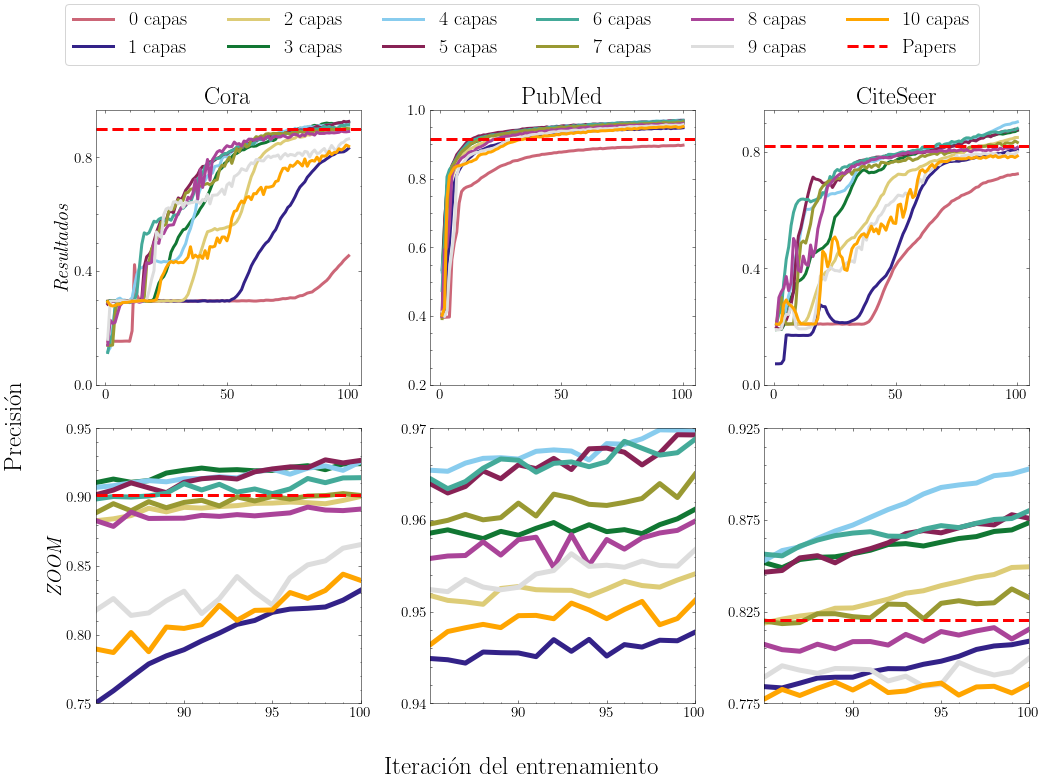

In [24]:
fig,ax = plt.subplots(2,3,figsize=(15,10
                                  ),tight_layout = "True")

plt.rcParams['font.size'] = 20  
for  data__ in layers.keys():
    
    for l in range(11):
        if l == 10:
            ax[0][data__].plot(list(range(1,101)),layers[data__]["%s"%l][1] ,linestyle="-",label="{} capas".format(l),linewidth=3, c="orange" )
        else:
            ax[0][data__].plot(list(range(1,101)),layers[data__]["%s"%l][1] ,linestyle="-",label="{} capas".format(l),linewidth=3)
    
    ax[0][data__].axhline(y = max_accurracy[data__], color = 'r', linestyle = '--',label="Papers",linewidth=3 ) 
   
   
    
   
    
    ax[0][data__].set_yticks(ax[0][data__].get_yticks()[::len(ax[0][data__].get_yticks())//3])
    
    
    for l in range(11):
        if l == 10:
            ax[1][data__].plot(list(range(1,101)),layers[data__]["%s"%l][1] ,linestyle="-",label="{} capas".format(l),linewidth=5, c="orange" )
        else:
            ax[1][data__].plot(list(range(1,101)),layers[data__]["%s"%l][1] ,linestyle="-",label="{} capas".format(l),linewidth=5)
    
   
   
    ax[1][data__].axhline(y = max_accurracy[data__], color = 'r', linestyle = '--',linewidth=3 )
    ax[1][data__].set_xlim(85,100)
    aux = [layers[data__]["%s"%l][1][84]  for l in range(1,11)]
    aux2 = [max(layers[data__]["%s"%l][1][84:]) for l in range(11)] 
    ax[1][data__].set_ylim(min(aux),max(aux2))
    
    
    ax[1][data__].set_yticks(ax[1][data__].get_yticks()[::len(ax[1][data__].get_yticks())//3])
    ax[1][data__].set_xticks(ax[1][data__].get_xticks()[1:])
for c, ax_ in zip(["Cora","PubMed","CiteSeer"], ax[0]):
    ax_.set_title(c)

ax[0,0].set_ylabel("\it{Resultados}",
                   ha='center', va='center',c ="black",labelpad=10,fontsize = 20)
ax[1,0].set_ylabel("\it{ZOOM}",
                   ha='center', va='center',c ="black",labelpad=10,fontsize = 20)

fig. supxlabel("Iteración del entrenamiento",fontsize = 25)
fig. supylabel("Precisión",fontsize = 25)
fig.legend(*ax[0][0].get_legend_handles_labels(),ncol=6,bbox_to_anchor = (0, 0.1, 1, 1),
           bbox_transform = plt.gcf().transFigure, loc='upper center',frameon =True)#, fancybox=True, shadow=True
fig.savefig('./data/train_fig.png')

Veamos de una forma más visual, cuales son los resultados finales de cada modelo según el numero de capas y como los experimentos sin skip connection y sin sampling, se comportan en comparación con los modelos con toda la estructura de la red neuronal gráfica.

<ipython-input-25-583fbf4a5429>:77: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


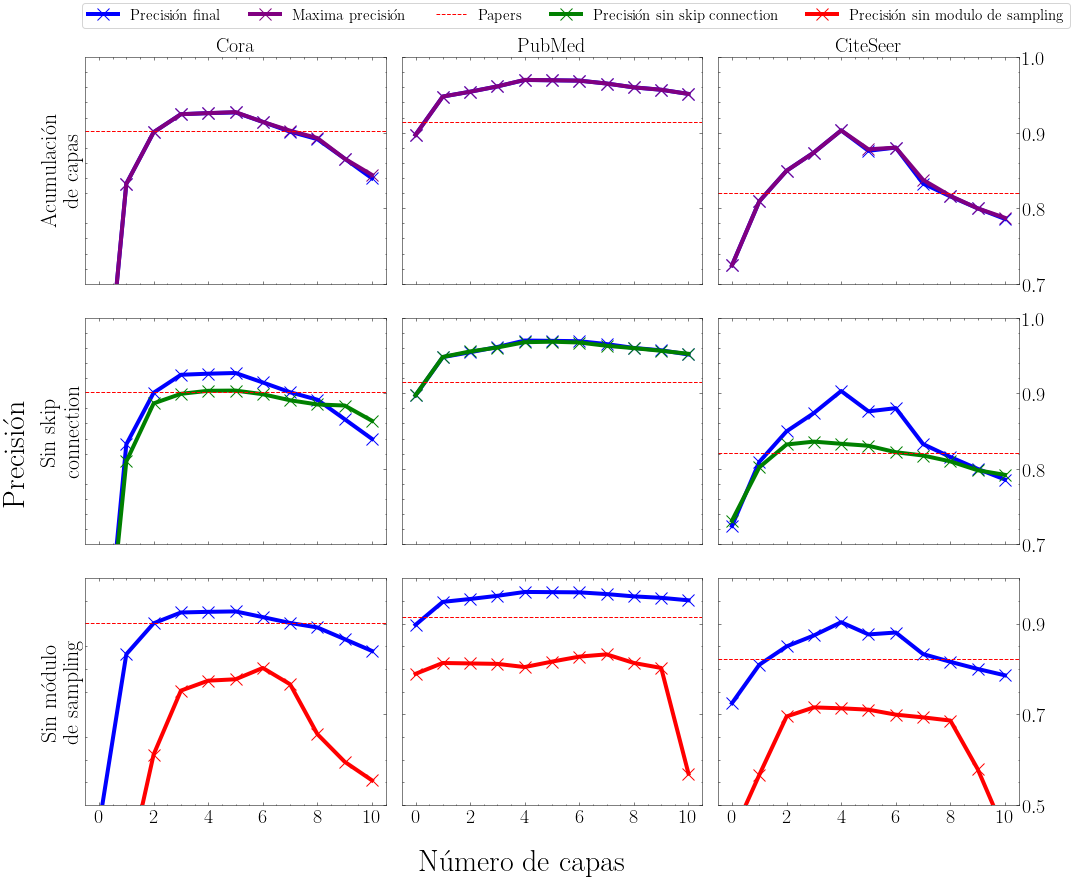

In [25]:
#Codigo modificado
fig,ax = plt.subplots(3,3,figsize=(15,12),tight_layout = "True",sharey = "row",sharex= True)
plt.rcParams['font.size'] = 15   

for  data__ in layers.keys():
    
    
    ax[0][data__].set_title( n_dataset[data__],fontsize = 20)
    ax[0][data__].plot(list(range(11)),[layers[data__]["%s"%l][1][-1] for l in range(11) ],c ="blue",marker ="x",linestyle="-",label="Precisión final",markersize=12,linewidth=4)
    ax[0][data__].plot(list(range(11)),[max(layers[data__]["%s"%l][1]) for l in range(11)],c ="purple",marker ="x",linestyle="-",label ="Maxima precisión ",markersize=12,linewidth=4)
    ax[0][data__].axhline(y = max_accurracy[data__], color = 'r', linestyle = '--',label = "Papers" ) 
    """val = 0.711
    res = -0.2
    done = False
    for a1,aux in zip(list(range(11)),[layers[data__]["%s"%l][1][-1] for l in range(11) ]):
        if aux-0.01<0.7: 
            ax[0][data__].annotate("", xy=(5,0.75), xytext=(0, 0.7),
            arrowprops=dict(arrowstyle="->"))
            ax[0][data__].annotate("%.3f" %aux, (5,0.75),c = "blue",fontsize = 20)"""
            
    if min([layers[data__]["%s"%l][1][-1] for l in range(11) ]) < 0.7:
        ax[0][data__].set_ylim(0.7,1.0)
    
    ax[0][data__].set_yticks(ax[0][data__].get_yticks()[::len(ax[0][data__].get_yticks())//3])

    
   
    ax[1][data__].plot(list(range(11)),[layers[data__]["%s"%l][1][-1] for l in range(11) ],c ="blue",marker ="x",linestyle="-",label="Precisión con skip connection",markersize=12,linewidth=4)
    ax[1][data__].plot(list(range(11)),[NoSkip[data__]["%s"%l][1][-1] for l in range(11)],c ="green",marker ="x",linestyle="-",label ="Precisión sin skip connection",markersize=12,linewidth=4)
    ax[1][data__].axhline(y = max_accurracy[data__], color = 'r', linestyle = '--',label = "Papers" ) 
    
   
    """for a1,aux in zip(list(range(11)),[NoSkip[data__]["%s"%l][1][-1] for l in range(11) ]):
        if aux-0.01<0.7: 
            ax[1][data__].annotate("", xy=(5,0.75), xytext=(0, 0.7),
            arrowprops=dict(arrowstyle="->"))
            ax[1][data__].annotate("%.3f" %aux, (5,0.75),c = "purple",fontsize = 20)
            val = 0.711 if val == 0.75 else 0.75"""
    if min([NoSkip[data__]["%s"%l][1][-1] for l in range(11) ]) < 0.7:
        ax[1][data__].set_ylim(0.7,1.0)
    
    
    ax[1][data__].set_yticks(ax[1][data__].get_yticks()[::len(ax[1][data__].get_yticks())//3])

    
   
    ax[2][data__].plot(list(range(11)),[layers[data__]["%s"%l][1][-1] for l in range(11) ],c ="blue",marker ="x",linestyle="-",label="Precisión con modulo de sampling",markersize=12,linewidth=4)
    ax[2][data__].plot(list(range(11)),[NoSamp[data__]["%s"%l][1][-1] for l in range(11)],c ="red",marker ="x",linestyle="-",label ="Precisión sin modulo de sampling",markersize=12,linewidth=4)
    ax[2][data__].axhline(y = max_accurracy[data__], color = 'r', linestyle = '--',label = "Papers" ) 
   
  
    if min([NoSamp[data__]["%s"%l][1][-1] for l in range(11) ]) < 0.7:
        ax[2][data__].set_ylim(0.5,1.0)
    
   
   
   
    
    ax[2][data__].set_yticks(ax[2][data__].get_yticks()[::len(ax[2][data__].get_yticks())//3])

lines_labels = [ ax_.get_legend_handles_labels() if i== 0 else  (ax_.get_legend_handles_labels()[0][1:-1],ax_.get_legend_handles_labels()[1][1:-1]) for i,ax_ in enumerate(ax[:,0])]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines,labels,ncol=5,bbox_to_anchor = (0.05, 0.03, 1, 1),
           bbox_transform = plt.gcf().transFigure, loc='upper center',frameon =True)
for r, ax_ in zip(["Acumulación\n de capas","Sin skip\n connection","Sin módulo\n de sampling"], ax[:,0]):
    
    ax_.set_ylabel(r, labelpad=20,
                   ha='center', va='center',c ="black",fontsize = 22)
ax[0,2].yaxis.set_tick_params(right = True,labelright= True)
ax[0,0].yaxis.set_tick_params(left = False,labelleft= False)
ax[1,2].yaxis.set_tick_params(right = True,labelright= True)
ax[1,0].yaxis.set_tick_params(left = False,labelleft= False)
ax[2,2].yaxis.set_tick_params(right = True,labelright= True)
ax[2,0].yaxis.set_tick_params(left = False,labelleft= False)
fig.supxlabel("Número de capas",fontsize = 30)
fig.supylabel("Precisión",fontsize = 30)
fig.show()
fig.savefig('./data/alltest.png')

Skip connection sin comparar resultados

<ipython-input-26-abbfd36eee33>:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


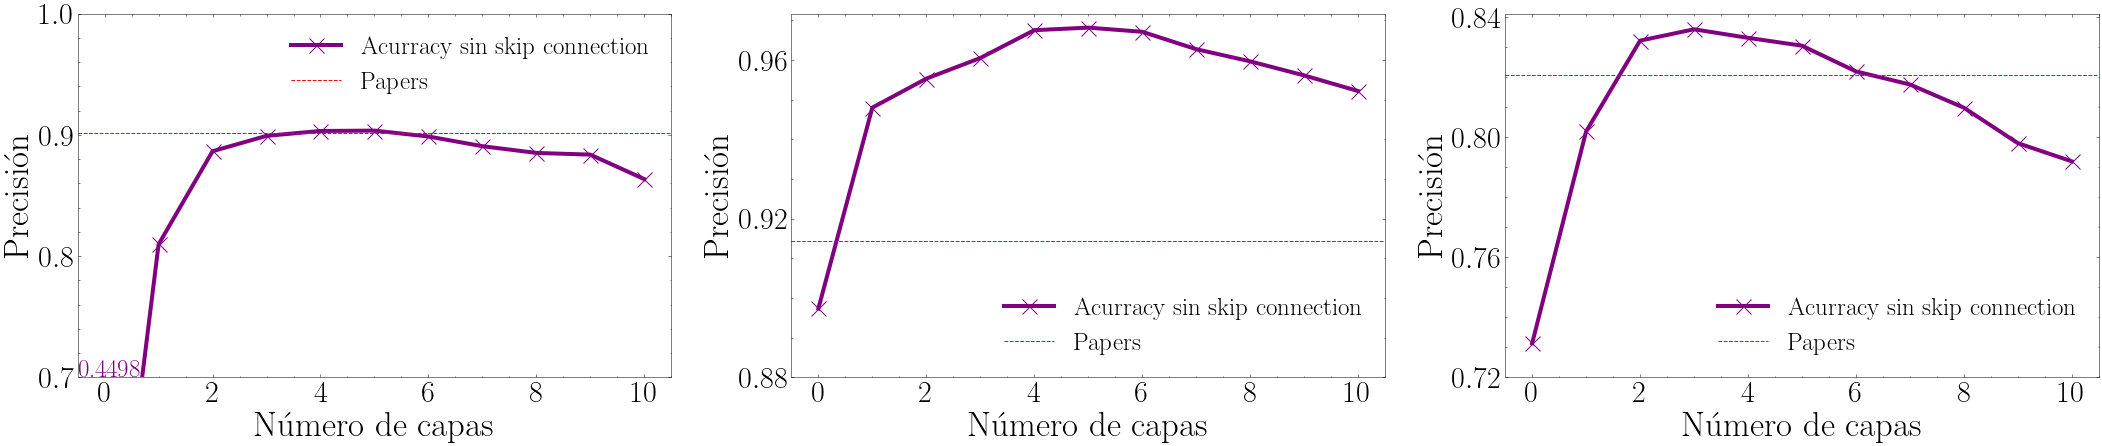

In [26]:
plt.rcParams['font.size'] = 30
fig,ax = plt.subplots(1,3,figsize=(30,7),tight_layout = "True")    
for  data__ in layers.keys():
    
    #ax[data__].set_title(n_dataset[data__],fontsize = 20)
   
    ax[data__].plot(list(range(11)),[NoSkip[data__]["%s"%l][1][-1] for l in range(11)],c ="purple",marker ="x",linestyle="-",label ="Acurracy sin skip connection",markersize=15,linewidth=4)
    ax[data__].axhline(y = max_accurracy[data__], color = 'r', linestyle = '--',label = "Papers" ) 
   
    val = 0.701
    for a1,aux in zip(list(range(11)),[NoSkip[data__]["%s"%l][1][-1] for l in range(11) ]):
        if aux-0.01<0.7: 
            ax[data__].annotate("%.4f" %aux, (a1-0.5,val),c = "purple",fontsize = 25)
            val = 0.701 if val == 0.73 else 0.73
    if min([NoSkip[data__]["%s"%l][1][-1] for l in range(11) ]) < 0.7:
        ax[data__].set_ylim(0.7,1.0)
    ax[data__].legend(fontsize = 25)
    ax[data__].set_xlabel("Número de capas",fontsize = 35)
    ax[data__].set_ylabel("Precisión",fontsize = 35)
    
    ax[data__].set_yticks(ax[data__].get_yticks()[::len(ax[data__].get_yticks())//3])
fig.show()   
fig.savefig('./data/skip_fig_noComp.png')

Experimento sin sampling sin compararlo

<ipython-input-27-bd6ae55fe46b>:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


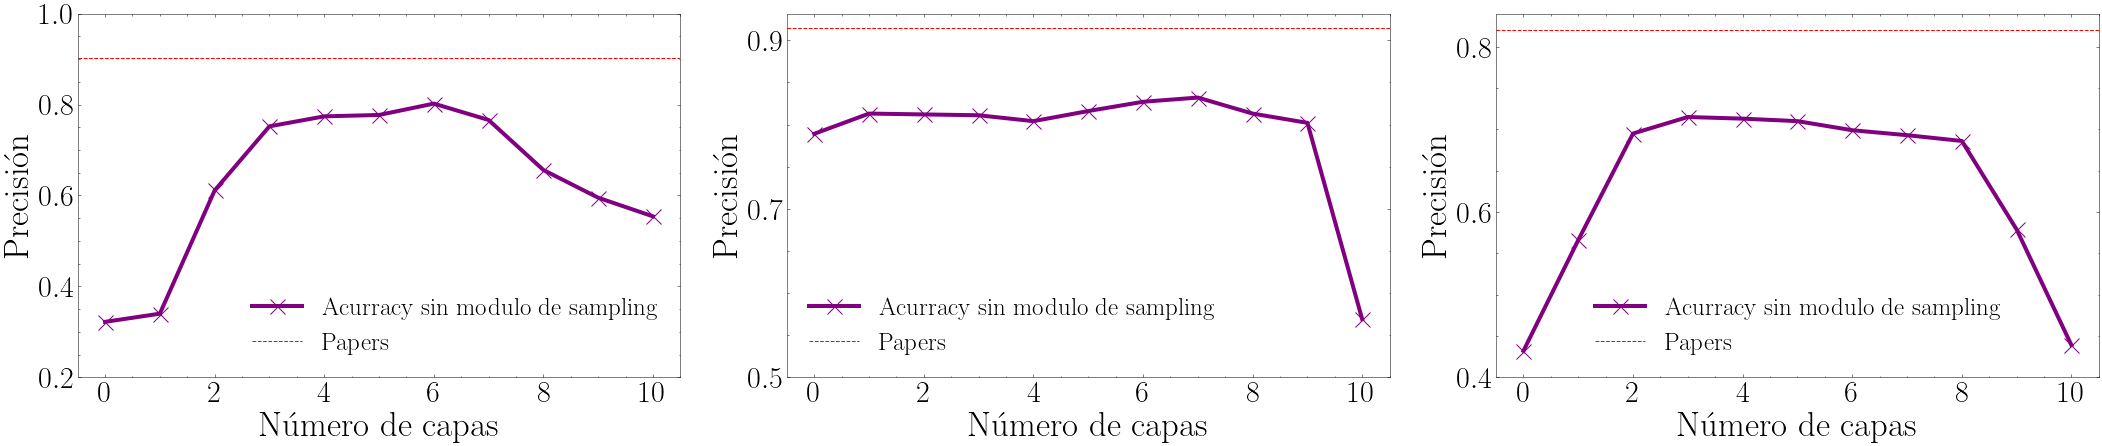

In [27]:
plt.rcParams['font.size'] = 30
fig,ax = plt.subplots(1,3,figsize=(30,7),tight_layout = "True")  
for  data__ in layers.keys(): 
    
    
    
    ax[data__].plot(list(range(11)),[NoSamp[data__]["%s"%l][1][-1] for l in range(11)],c ="purple",marker ="x",linestyle="-",label ="Acurracy sin modulo de sampling",markersize=15,linewidth=4)
    ax[data__].axhline(y = max_accurracy[data__], color = 'r', linestyle = '--',label = "Papers" ) 
    
    
    ax[data__].legend(fontsize = 25)
    ax[data__].set_xlabel("Número de capas",fontsize = 35)
    ax[data__].set_ylabel("Precisión",fontsize = 35)
    
    ax[data__].set_yticks(ax[data__].get_yticks()[::len(ax[data__].get_yticks())//3])
fig.show()
fig.savefig('./data/sampling_fig_noComp.png')